### Data Preparation

In [4]:
import subprocess as sp
import sys,os,shutil,pickle,time
from os.path import join

In [5]:
import pandas as pd
import numpy as np

In [13]:
df = pd.read_csv('cars_cleaned.csv')
df.head(5)

,price,year,manufacturer,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,paint_color
0,16995,2007.0,gmc,good,8 cylinders,diesel,254217.0,clean,automatic,4wd,full-size,truck,white
1,13995,2012.0,ford,good,6 cylinders,gas,188406.0,clean,automatic,4wd,full-size,truck,grey
2,7995,2010.0,chevrolet,good,4 cylinders,gas,108124.0,clean,automatic,4wd,full-size,SUV,grey
3,8995,2011.0,chevrolet,good,6 cylinders,gas,178054.0,clean,automatic,4wd,full-size,SUV,white
4,10995,2014.0,ford,good,6 cylinders,gas,170259.0,clean,automatic,4wd,full-size,SUV,white


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 232346 entries, 0 to 232345
Data columns (total 13 columns):
price           232346 non-null int64
year            232346 non-null float64
manufacturer    232346 non-null object
condition       232346 non-null object
cylinders       232346 non-null object
fuel            232346 non-null object
odometer        232346 non-null float64
title_status    232346 non-null object
transmission    232346 non-null object
drive           232346 non-null object
size            232346 non-null object
type            232346 non-null object
paint_color     232346 non-null object
dtypes: float64(2), int64(1), object(10)
memory usage: 23.0+ MB


**Label Processing**

In [15]:
from sklearn import preprocessing
import pandas as pd
le = preprocessing.LabelEncoder()

df[['manufacturer', 'condition', 'cylinders','fuel','title_status', 'transmission','drive','size','type','paint_color']] = df[['manufacturer', 'condition','cylinders', 'fuel','title_status', 'transmission','drive','size','type','paint_color']].apply(le.fit_transform)
#df['city'] = le.fit(df['city'])

Split Train and Test data

In [16]:
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt

y= df.price
X= df.drop('price',axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print (X_train.shape, y_train.shape)
print (X_test.shape, y_test.shape)

(185876, 12) (185876,)
(46470, 12) (46470,)


**Min-max scaler:**

For each value in a feature, MinMaxScaler subtracts the minimum value in the feature and then divides by the range. The range is the difference between the original maximum and original minimum.

In [17]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()   
X_train= sc.fit_transform(X_train)
X_test= sc.transform(X_test)

### Multi-Layer Perceptron

In [68]:
from sklearn import metrics
from sklearn.neural_network import MLPRegressor
import seaborn as sns
plt.style.use('ggplot')

In [69]:
important_features.append('price')

In [70]:
df = pd.read_csv('cars_cleaned.csv')
le = preprocessing.LabelEncoder()
#df = df[important_features]
df[important_features] = df[important_features].apply(le.fit_transform)

In [71]:
df = df[important_features]

In [73]:
y= df.price
X= df.drop('price',axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(185876, 7) (185876,)
(46470, 7) (46470,)


Model Summary

In [74]:
model = MLPRegressor()
model.fit(X_train, y_train)
print(model)

MLPRegressor(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)


Predictions and Testing

In [75]:
expected_y  = y_test
predicted_y = model.predict(X_test)

In [80]:
r2 = metrics.r2_score(expected_y, predicted_y)
print("R2 Score: ", r2)

R2 Score:  0.5790540287936469


Plot of Actual vs Predicted Values

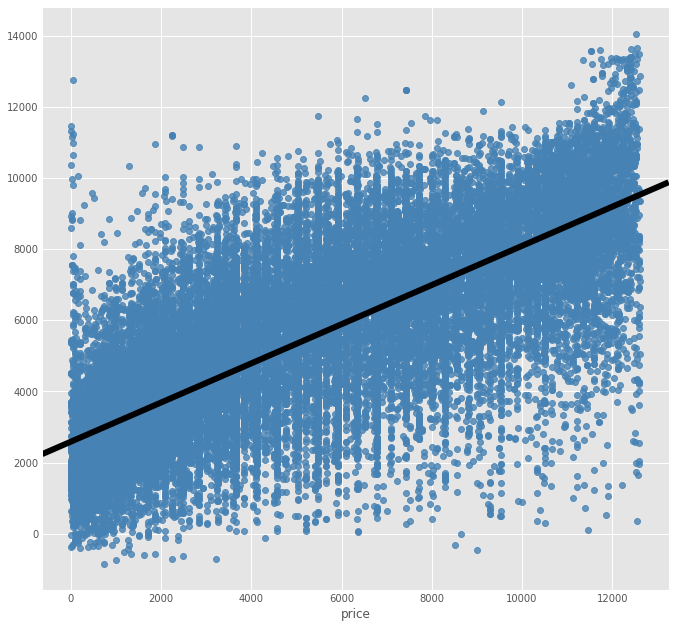

In [81]:
plt.figure(figsize=(10,10))
sns.regplot(expected_y, predicted_y, fit_reg=True, scatter_kws={"color": "steelblue"}, line_kws={"color": "black"})